## Data Analysis Project Life Cycle
- **Business problem understanding**
- **Data Collection**
- **Data Pre-Processing**
- **Data Analysis**
- **Reporting**

### Business Problem
- **Client want us to analyse Flight data in order to understand the trends  , insights  , top performing Airline , prices , duration so then can prepare better to improve travelling experience**

## Data Collection
- **Client has provided data in csv file**
- **Link:  https://drive.google.com/file/d/1n9FqH3D1-nvviwvktEZeW4cgEPacGuRe/view?usp=drive_link**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Rocky Yadav\Downloads\Flight_Data.csv", encoding='unicode_escape', low_memory=False)

In [3]:
df = data.copy()

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,03-01-2018
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,04-01-2018
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,05-01-2018


### Data PreProcessing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistency**
- **Data Formatting**
- **Outlier Detection and Removal**

In [5]:
data.shape

(301206, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              358 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [7]:
data.isna().sum()

Unnamed: 0               0
airline                452
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                  200
duration               250
days_left                0
price                  100
date                300848
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'date'],
      dtype='object')

In [10]:
num_col = data.select_dtypes(include = np.number).columns
num_col

Index(['Unnamed: 0', 'duration', 'days_left'], dtype='object')

In [11]:
other_col = data.select_dtypes(include = object).columns
other_col

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'price', 'date'],
      dtype='object')

In [12]:
data['airline'].isna().sum()

452

### Data Profilling
1.**airline**
   - Null values can be replaced with mode

2.**flight**
   - Should be dropped

3.**source_city and destination_city**
   - Everything is looking good

4.**departure_time and arrival_time**
   - Outliers should be removed

5.**stops**
   - Everything is looking good

6.**class**
   - Null values can be replaces with mode

7.**duration**
   - Null values can be removed
   - Outliers should be removed

8.**days_left**
   - Everything looking good

9.**price**
   - Need to change the data type from object to integer
   - Rows containing null values should be dropped
   - Need to drop the rows corresponding to inconsistent values

10.**Unnamed: 0 and date**
   - Need to dropes

## Data Cleaning

### Unnamed: 0 and date and flight

In [13]:
data.drop(['Unnamed: 0' , 'date' , 'flight'] ,axis = 1 ,  inplace = True)

In [14]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Airline

In [15]:
airline_mode = data['airline'].mode()[0]
airline_mode

'Vistara'

In [16]:
data['airline'] = data['airline'].fillna(airline_mode)

In [17]:
data['airline'].isna().sum()

0

### Class

In [18]:
class_mode = data['class'].mode()[0]
class_mode

'Economy'

In [19]:
data['class'] = data['class'].fillna(class_mode)

In [20]:
data['class'].isna().sum()

0

### Duration

In [21]:
data.dropna(subset = ['duration'] , inplace = True)

In [22]:
data['duration'].isna().sum()

0

### Price

In [23]:
data["price"] = pd.to_numeric(data['price'] , errors = 'coerce')

In [24]:
data["price"].info()

<class 'pandas.core.series.Series'>
Index: 300956 entries, 0 to 301205
Series name: price
Non-Null Count   Dtype  
--------------   -----  
300854 non-null  float64
dtypes: float64(1)
memory usage: 4.6 MB


In [25]:
data.dropna(subset = ["price"] , inplace = True)

In [26]:
data["price"].isna().sum()

0

In [27]:
data.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [28]:
data.to_excel("Cleaned_Flight_data.xlsx")

### Outlier Detection and Removal

In [28]:
data.describe()

,duration,days_left,price
count,300854.000000,300854.000000,3.008540e+05
mean,12.234572,26.035509,2.108129e+04
std,7.298037,13.571264,2.543790e+04
min,0.830000,1.000000,1.105000e+03
25%,6.830000,15.000000,4.784000e+03
50%,11.250000,26.000000,7.427000e+03
75%,16.170000,38.000000,4.252100e+04
max,622.250000,49.000000,2.512780e+06


### Duration

In [29]:
Q1_duration = data['duration'].quantile(0.25)
Q1_duration

6.83

In [30]:
Q3_duration = data['duration'].quantile(0.75)
Q3_duration

16.17

In [31]:
IQR_duration = Q3_duration - Q1_duration
IQR_duration

9.340000000000002

In [32]:
lower_limit_duration = Q1_duration - 1.5*IQR_duration
upper_limit_duration = Q3_duration + 1.5*IQR_duration

In [33]:
print(lower_limit_duration)
print(upper_limit_duration)

-7.1800000000000015
30.180000000000003


In [34]:
data = data[(data["duration"]>lower_limit_duration) & (data["duration"]<upper_limit_duration)]
data.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0
5,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955.0
6,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060.0
7,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060.0
8,GO_FIRST,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954.0
9,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954.0


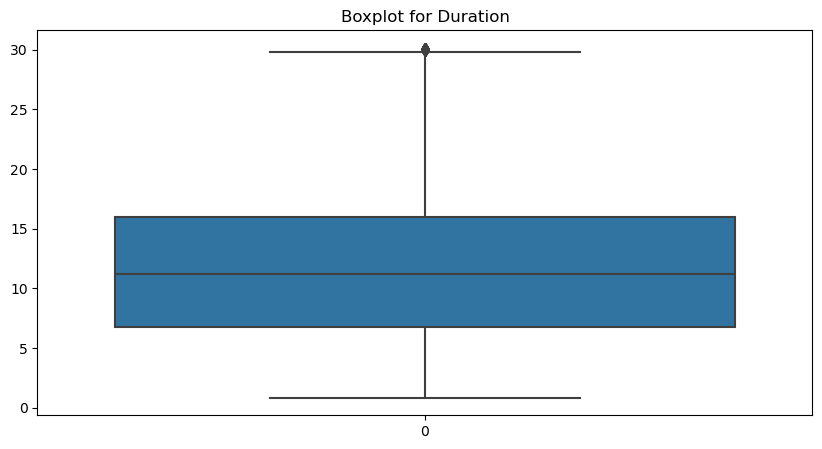

In [38]:
fig , ax = plt.subplots(figsize = (10,5))

#Ploting boxplot
sns.boxplot(data = data['duration'] , ax=ax)
ax.set_title("Boxplot for Duration")

plt.show()

In [49]:
data.to_excel("Final_Flight_data.xlsx")

In [35]:
data.describe()

,duration,days_left,price
count,298733.000000,298733.000000,2.987330e+05
mean,12.081515,26.063883,2.111066e+04
std,6.995095,13.562508,2.548633e+04
min,0.830000,1.000000,1.105000e+03
25%,6.750000,15.000000,4.769000e+03
50%,11.170000,26.000000,7.425000e+03
75%,16.000000,38.000000,4.252100e+04
max,30.170000,49.000000,2.512780e+06


In [36]:
departure_data_price = data.groupby('departure_time')['price'].mean().reset_index()
departure_data_price

,departure_time,price
0,Afternoon,18344.500201
1,Early_Morning,20565.881941
2,Evening,21548.460829
3,Late_Night,9295.299387
4,Morning,21855.317102
5,Night,23208.647902


In [37]:
print(data['departure_time'].value_counts())

departure_time
Morning          70605
Early_Morning    66382
Evening          65100
Night            48157
Afternoon        47183
Late_Night        1306
Name: count, dtype: int64


In [38]:
print(data['duration'].value_counts())

duration
2.17     4243
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
29.25      15
6.98       15
13.40      15
29.92      11
6.07        5
Name: count, Length: 356, dtype: int64


In [39]:
duration_data_price = data.groupby('duration')['price'].mean().reset_index()
duration_data_price

,duration,price
0,0.83,1973.557692
1,0.92,2003.538462
2,1.00,2266.063660
3,1.08,2589.311031
4,1.17,2632.209375
...,...,...
351,29.83,24845.158416
352,29.92,5565.727273
353,30.00,13282.686869
354,30.08,27286.702128


## Exploratory Data Analysis

### Statistical Analysis

In [40]:
data.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


### Data Visualisation

### Airline wise analysis

In [41]:
#Plot data
data_airline_price = data.groupby(["airline"], as_index = False)["price"].mean()
print(data_airline_price)

     airline         price
0    AirAsia   4181.956335
1  Air_India  23837.069350
2   GO_FIRST   5682.426297
3     Indigo   5473.784636
4   SpiceJet   6547.777926
5    Vistara  30656.637318


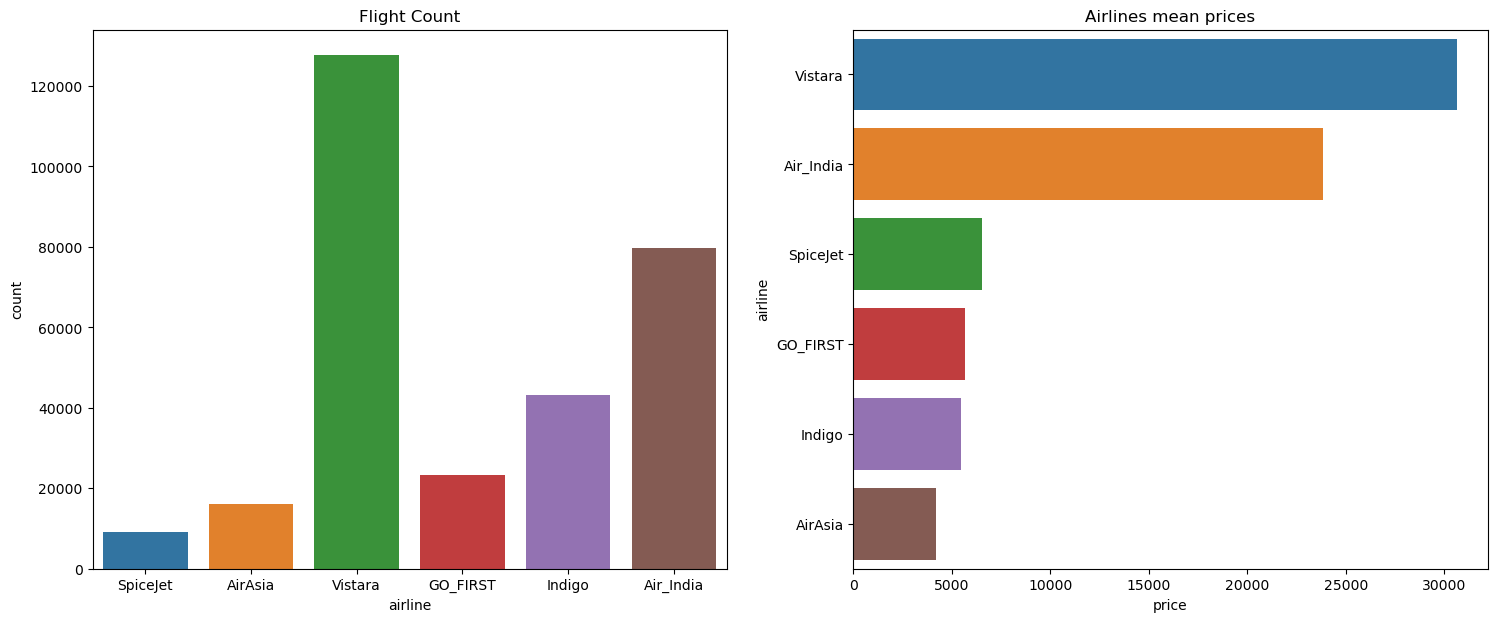

In [42]:
#plotting
data_airline_price = data_airline_price.sort_values(by='price', ascending=False)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Countplot
sns.countplot(x='airline', data=data, ax=ax[0])
ax[0].set_title("Flight Count")

# Barplot
sns.barplot(x='price', y='airline', orient='h', data=data_airline_price, ax=ax[1])
ax[1].set_title("Airlines mean prices")

plt.show()

### Conclusion 
 - Vistara operates maximum number of flights and Spicejet operates least
 - Mean price of vistara is highest and AirAsia having least

### Source_city and Destination_wise Analysis

In [43]:
source_grouped = data.groupby(['source_city' , 'class'] , as_index = False)['price'].mean()
print(source_grouped)
print()

source_count= data['source_city'].value_counts()
print(source_count)

   source_city     class         price
0    Bangalore  Business  53690.181974
1    Bangalore   Economy   6526.294410
2      Chennai  Business  54034.320874
3      Chennai   Economy   6851.471469
4        Delhi  Business  48698.288304
5        Delhi   Economy   7165.591904
6    Hyderabad  Business  50366.532219
7    Hyderabad   Economy   6207.890037
8      Kolkata  Business  56542.137309
9      Kolkata   Economy   7411.399483
10      Mumbai  Business  52734.515368
11      Mumbai   Economy   6336.833076

source_city
Delhi        61223
Mumbai       60709
Bangalore    51554
Kolkata      45881
Hyderabad    40638
Chennai      38728
Name: count, dtype: int64


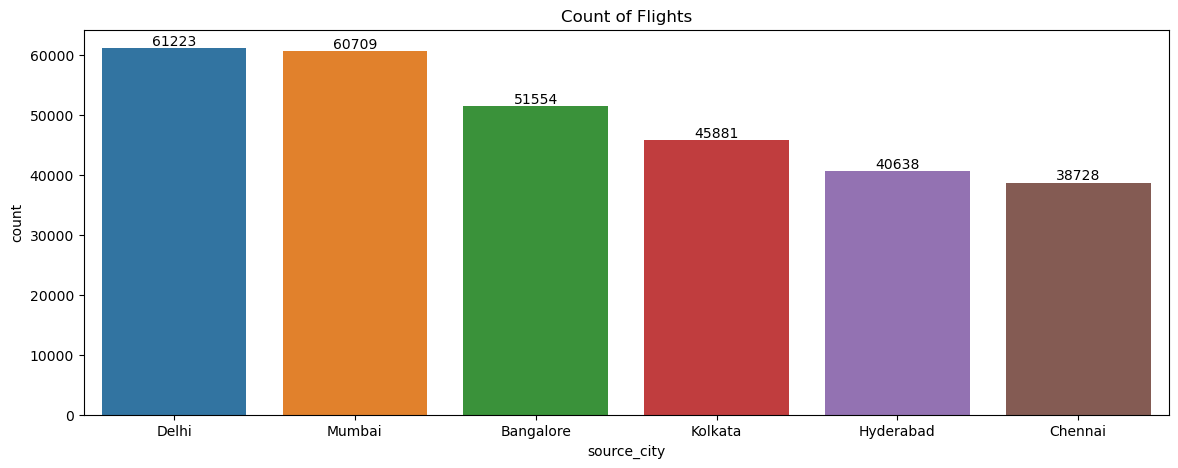

In [44]:
fig, ax = plt.subplots(figsize=(14, 5))

# Plotting countplot
bars = sns.countplot(x='source_city', data=data)
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
ax.set_title("Count of Flights")

# # Plotting barplot
# barplot = sns.barplot(x='source_city', y='price', hue='class', data=source_grouped, ax=ax[1])
# for container in barplot.containers:
#     barplot.bar_label(container, fmt='%.2f', label_type='edge' , rotation = 90)
# ax[1].set_title("Source City-wise Mean Price of Respective Classes")

# plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Source City-wise Mean Price of Respective Classes')

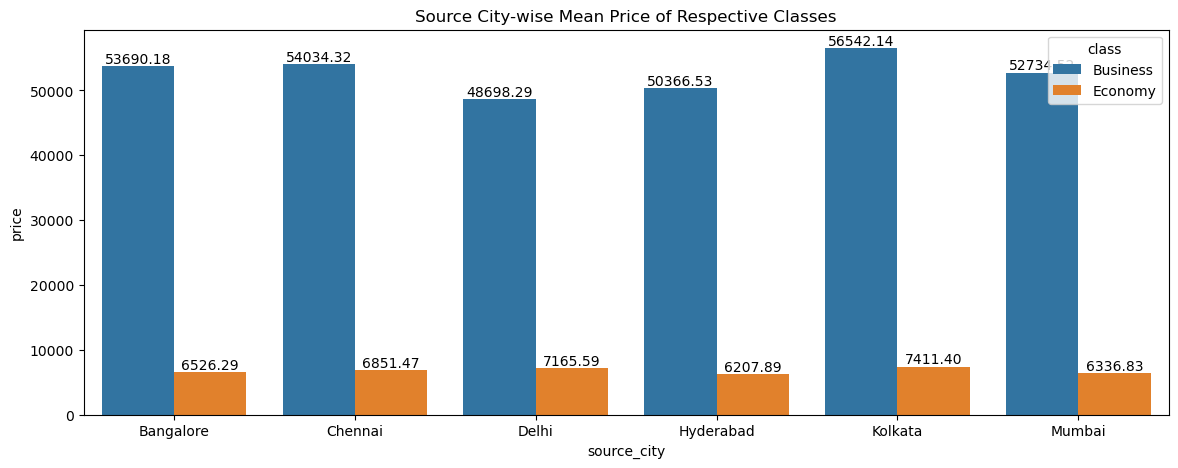

In [45]:
fig, ax = plt.subplots(figsize=(14, 5))
# Plotting barplot
barplot = sns.barplot(x='source_city', y='price', hue='class', data=source_grouped)
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge')
ax.set_title("Source City-wise Mean Price of Respective Classes")

In [46]:
all_cities = pd.concat([data['source_city'], data['destination_city']])
city_count = all_cities.value_counts()
print("City Count:\n", city_count)

City Count:
 Mumbai       119435
Delhi        118385
Bangalore    102266
Kolkata       95042
Hyderabad     83627
Chennai       78711
Name: count, dtype: int64


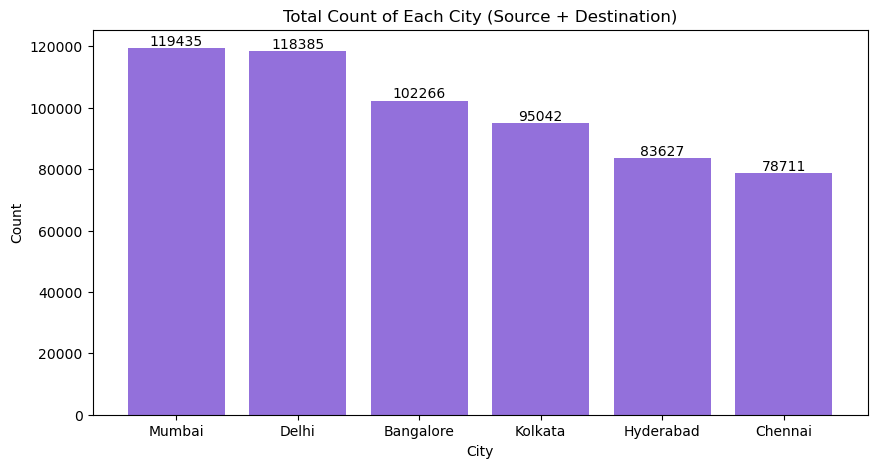

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(city_count.index, city_count.values, color='#9370DB')
ax.set_title("Total Count of Each City (Source + Destination)")
ax.set_xlabel("City")
ax.set_ylabel("Count")

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### Conclusion 
 - Mumbai is the buiest airport in the country among top 6 airports
 - Chennai is least buiest airpost among top 6 airports

## Stops Wise Analysis

In [48]:
stops_count = data['stops'].value_counts()
print(stops_count)
print()
stop_data_price = data.groupby(['stops','class'])['price'].mean().reset_index()
print(stop_data_price)

stops
one            250254
zero            36012
two_or_more     12467
Name: count, dtype: int64

         stops     class         price
0          one  Business  54656.518386
1          one   Economy   7047.188369
2  two_or_more  Business  70594.939335
3  two_or_more   Economy   8958.018873
4         zero  Business  27838.416060
5         zero   Economy   4156.737574


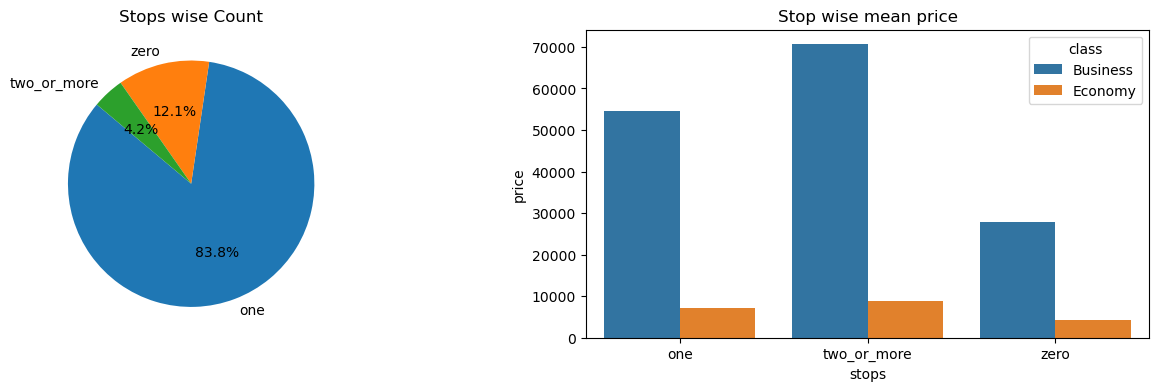

In [49]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Pie Plot
ax[0].pie(stops_count, labels=stops_count.index, autopct="%1.1f%%", startangle=140)
ax[0].set_title("Stops wise Count")

# Bar Plot
sns.barplot(x="stops", y="price", hue='class', data=stop_data_price, ax=ax[1])
ax[1].set_title("Stop wise mean price")

# Show the plots
plt.show()

## Colclusion
- Most Flights have one Stops.
- Price of flight having one stop is highest.

## Class Wise Analysis

In [50]:
count_class = data['class'].value_counts()
print(count_class)

price_class = data.groupby(['class'] , as_index = False)['price'].mean()
print(price_class)

class
Economy     205030
Business     93703
Name: count, dtype: int64
      class         price
0  Business  52510.105898
1   Economy   6760.456797


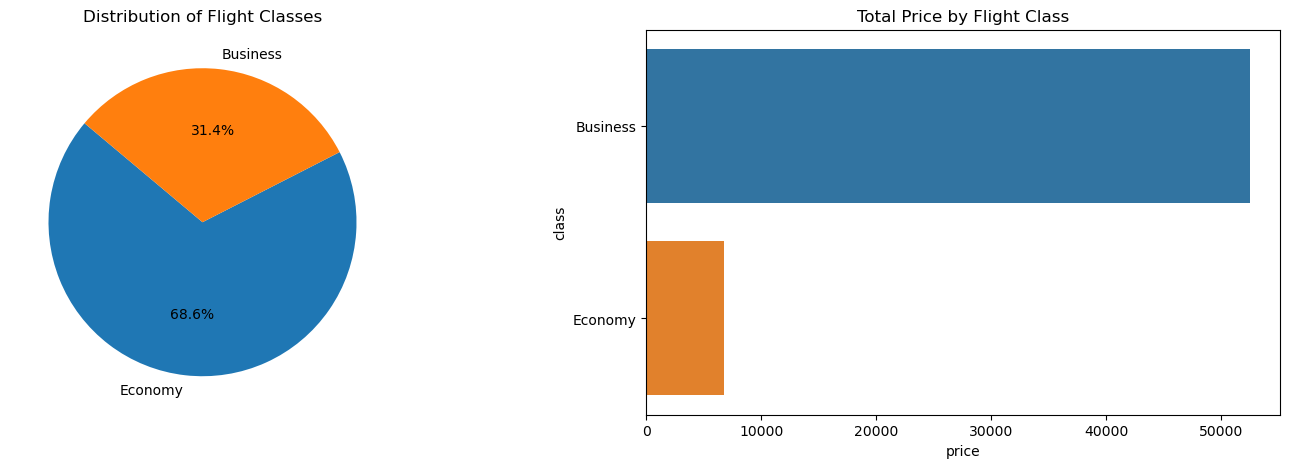

In [51]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Pie chart for count of classes
ax[0].pie(count_class, labels=count_class.index, autopct="%1.1f%%", startangle=140)
ax[0].set_title("Distribution of Flight Classes")

# Pie chart for total price by class
sns.barplot(x='price', y='class', data = price_class , ax=ax[1])
ax[1].set_title("Total Price by Flight Class")

plt.show()

### Conclusion
 - Economy class have more bookings than Business Class
 - Business class have higher mean price than Economy Class

## Times ( of Day ) wise analysis

In [52]:
all_times = pd.concat([data['arrival_time'], data['departure_time']])
times_count = all_times.value_counts()
print("Times Count:\n", times_count)

Times Count:
 Evening          142536
Night            139141
Morning          133446
Afternoon         85231
Early_Morning     81818
Late_Night        15294
Name: count, dtype: int64


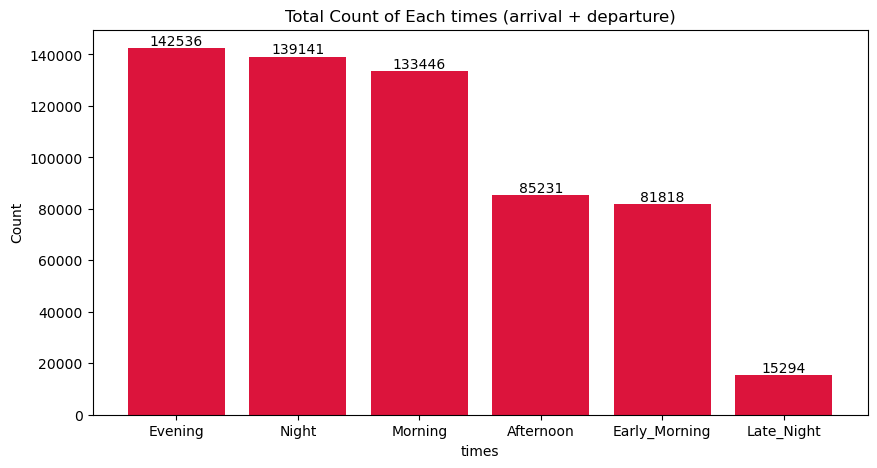

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(times_count.index, times_count.values, color='#DC143C')
ax.set_title("Total Count of Each times (arrival + departure)")
ax.set_xlabel("times")
ax.set_ylabel("Count")

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()

### Conclusion
 - Flights starting and ending journey at Evening is highest.
 - Flights starting and ending journey at Late_Night is highest.

In [75]:
times_price_class = data.groupby(['departure_time' , 'class'] , as_index = False)['price'].mean()
times_price_class

,departure_time,class,price
0,Afternoon,Business,50914.751365
1,Afternoon,Economy,6667.186922
2,Early_Morning,Business,52421.926245
3,Early_Morning,Economy,6656.827169
4,Evening,Business,52699.222498
5,Evening,Economy,6754.354479
6,Late_Night,Business,47471.971014
7,Late_Night,Economy,4784.699486
8,Morning,Business,53343.469199
9,Morning,Economy,7221.423293


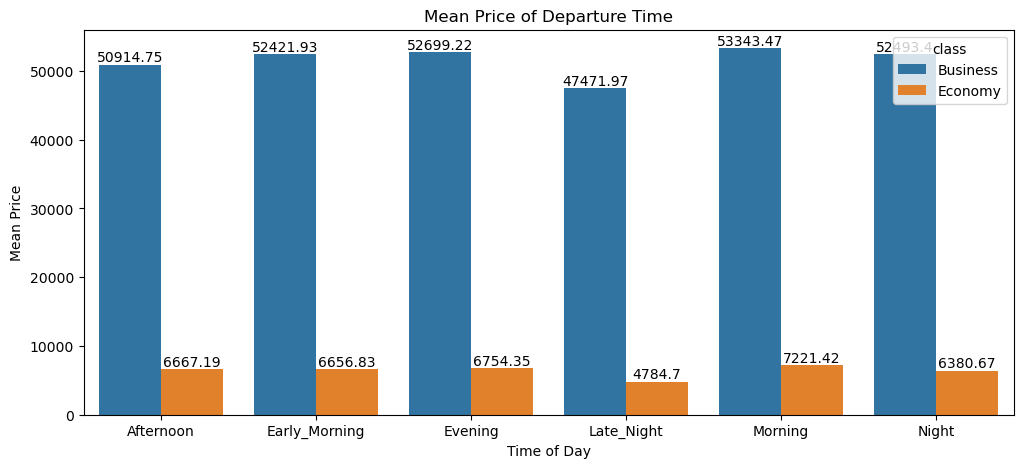

In [78]:
fig, ax = plt.subplots(figsize=(12, 5))

bars = sns.barplot(x='departure_time', y='price', hue='class', data=times_price_class, ax=ax)
ax.set_title("Mean Price of Departure Time")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Mean Price")

# Adding labels on top of bars
for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [54]:
times_price = data.groupby(['departure_time'])['price'].mean()
times_price

departure_time
Afternoon        18344.500201
Early_Morning    20565.881941
Evening          21548.460829
Late_Night        9295.299387
Morning          21855.317102
Night            23208.647902
Name: price, dtype: float64

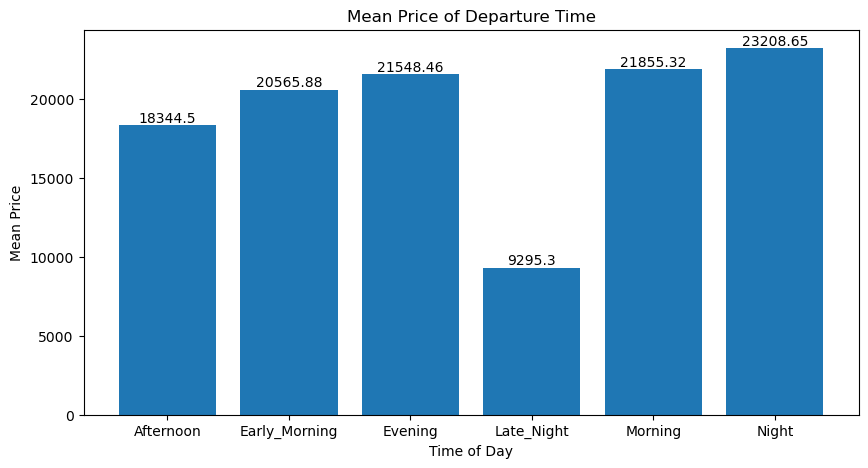

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(times_price.index, times_price.values)
ax.set_title("Mean Price of Departure Time")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Mean Price")

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### Conclusion
 - Night Flight have the highest mean price.
 - Late_Night have lowest mean price.

## Days_Left wise Analysis

In [56]:
price_days_left = data.groupby(['days_left'])['price'].mean().reset_index()
top_price_days_left = price_days_left.nlargest(5 , 'days_left')
print(top_price_days_left)

print()

smallest_price_days_left = price_days_left.nsmallest(5 , 'days_left')
print(smallest_price_days_left)

    days_left         price
48         49  19241.121310
47         48  19243.896880
46         47  18798.702271
45         46  19518.399740
44         45  19410.529244

   days_left         price
0          1  41107.422798
1          2  30294.731800
2          3  29142.256521
3          4  25792.914075
4          5  26722.568866


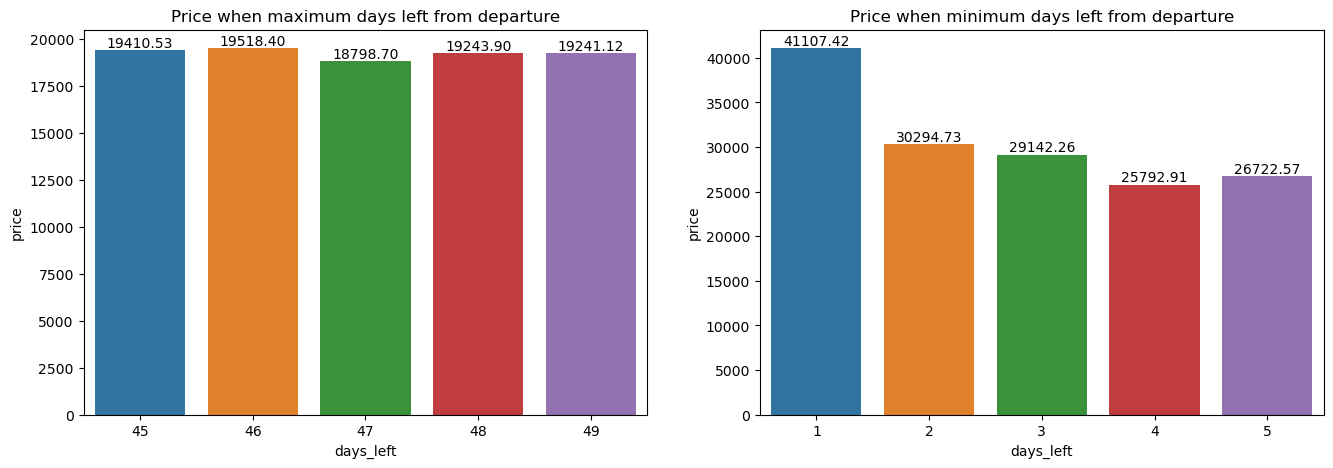

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in top_price_days_left and smallest_price_days_left
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot for minimum days left
sns.barplot(x='days_left', y='price', data=top_price_days_left, ax=ax[0])
ax[0].set_title("Price when maximum days left from departure")

# Adding values above bars for the first plot
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')

# Bar plot for maximum days left
sns.barplot(x='days_left', y='price', data=smallest_price_days_left, ax=ax[1])
ax[1].set_title("Price when minimum days left from departure")

# Adding values above bars for the second plot
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')

plt.show()


### Conclusion
 - Mean Price is Higher when days_Left is low.
 - Mean price is lower when Days_Left is high.

## Airline's mean Price when Days_Left is 1

In [58]:
# Filter data for days_left = 1
days_left_1 = data[data['days_left'] == 1]

# Group by airline and calculate the mean price
mean_price_airlines = days_left_1.groupby('airline')['price'].mean().reset_index()

print(mean_price_airlines)

     airline         price
0    AirAsia  27922.682353
1  Air_India  42828.199640
2   GO_FIRST  20143.111111
3     Indigo  28889.242925
4   SpiceJet  58262.780822
5    Vistara  49251.202532


Text(0, 0.5, 'Price')

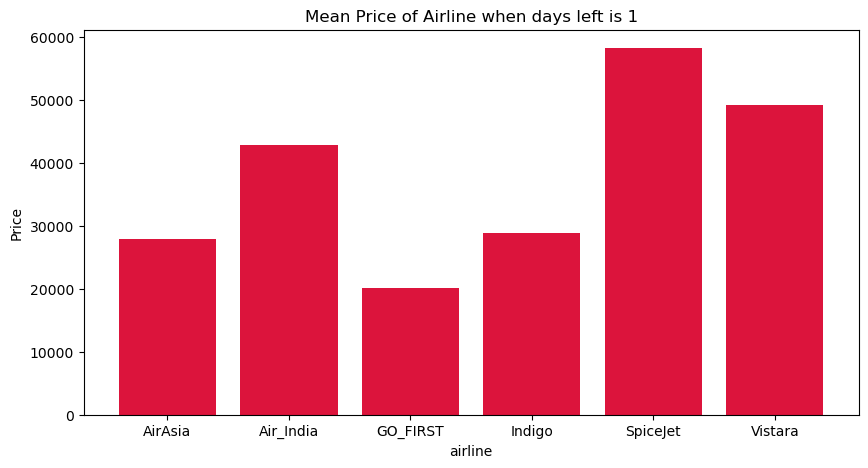

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot
ax.bar(mean_price_airlines['airline'], mean_price_airlines['price'], color='#DC143C')
ax.set_title("Mean Price of Airline when days left is 1")
ax.set_xlabel("airline")
ax.set_ylabel("Price")

### Conclusion
 - Vistara charges highest when Days_Left is 1.
 - GO_First charge is lowest when Days_Left is 1.

## Busy Route and Expensive Routes

In [60]:
# Create a new column for merged and sorted routes
data['route'] = data.apply(lambda row: '-'.join(sorted([row['source_city'][:3], row['destination_city'][:3]])), axis=1)

grouped_routes_count = data.groupby('route').size().reset_index(name='flight_count').nlargest(5 , 'flight_count')

grouped_routes_price = data.groupby('route', as_index=False)['price'].mean()

top_routes_price = grouped_routes_price.nlargest(5, 'price')

least_routes_price = grouped_routes_price.nsmallest(5 , 'price')

print(top_routes_price)
print(grouped_routes_count)

     route         price
0  Ban-Che  24229.675916
7  Che-Kol  23259.496114
6  Che-Hyd  23245.052700
4  Ban-Mum  23140.285453
3  Ban-Kol  23049.955262
      route  flight_count
11  Del-Mum         30138
1   Ban-Del         27733
4   Ban-Mum         25703
14  Kol-Mum         23818
10  Del-Kol         22400


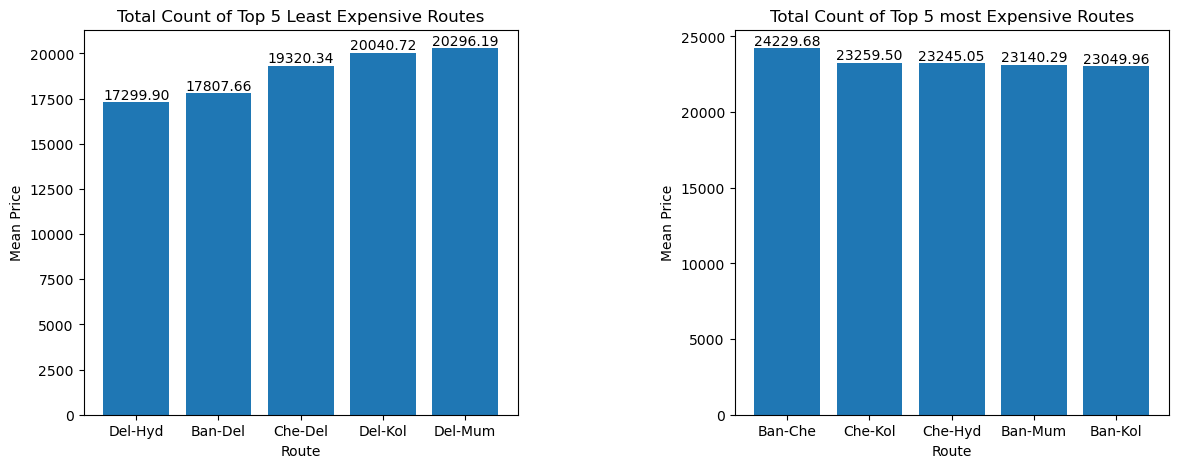

In [61]:
import matplotlib.pyplot as plt

# Assuming you have your data in grouped_routes_count and top_routes_price
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for mean price
bars1 = ax[0].bar(least_routes_price['route'], least_routes_price['price'])
ax[0].set_title("Total Count of Top 5 Least Expensive Routes")
ax[0].set_xlabel("Route")
ax[0].set_ylabel("Mean Price")

# Adding values above bars
for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# # Bar plot for flight count
# bars1 = ax[0].bar(grouped_routes_count['route'], grouped_routes_count['flight_count'], color='#DC143C')
# ax[0].set_title("Total Count of Top 5 Busiest Routes")
# ax[0].set_xlabel("Route")
# ax[0].set_ylabel("Flight Count")

# # Adding values above bars
# for bar in bars1:
#     yval = bar.get_height()
#     ax[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Bar plot for mean price
bars2 = ax[1].bar(top_routes_price['route'], top_routes_price['price'])
ax[1].set_title("Total Count of Top 5 most Expensive Routes")
ax[1].set_xlabel("Route")
ax[1].set_ylabel("Mean Price")

# Adding values above bars
for bar in bars2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.subplots_adjust(wspace=0.50)
plt.show()


### Conclusion 
 - Delhi - Hyderabad is the Least Expensive route.
 - Banglore - Chennai is Most Expensive Route.

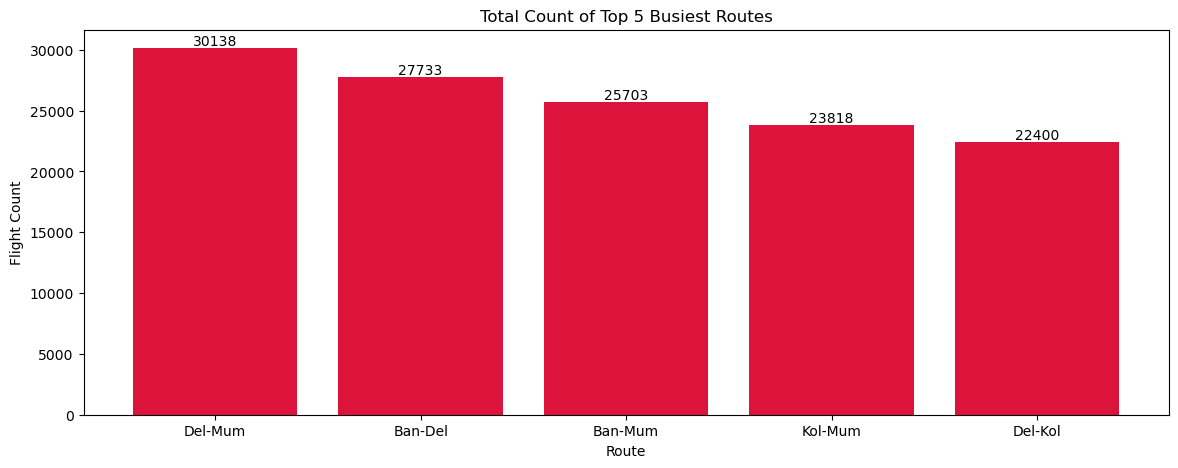

In [62]:
fig, ax = plt.subplots(figsize=(14, 5))

# Bar plot for flight count
bars1 = ax.bar(grouped_routes_count['route'], grouped_routes_count['flight_count'], color='#DC143C')
ax.set_title("Total Count of Top 5 Busiest Routes")
ax.set_xlabel("Route")
ax.set_ylabel("Flight Count")

# Adding values above bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


In [63]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,Del-Mum
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,Del-Mum
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,Del-Mum
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,Del-Mum
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,Del-Mum


In [64]:
duration_price = data.groupby(['duration'] , as_index = False)['price'].mean()
duration_price_top = duration_price.nlargest(5 , 'price')
print(duration_price_top)

duration_price_low = duration_price.nsmallest(5 , 'price')
print(duration_price_low)

     duration         price
214     18.42  33718.516129
209     18.00  33142.248120
238     20.42  32524.361404
313     26.67  32445.709163
141     12.42  32417.741097
   duration        price
0      0.83  1973.557692
1      0.92  2003.538462
2      1.00  2266.063660
3      1.08  2589.311031
4      1.17  2632.209375


In [61]:
data.to_csv("Final_Sheet_Flight_Data.csv")